# **Course: Python Programming AML 1214**

# **Disaster Detection Project -Group Shardeum**


## **Submitted by:**

---

> * Chirag Bansal (C0908045)

> * Sahibpreet Singh (C0928040)

> * Balpreet Singh (C0924974)

> * Suril Purohit (C0928435)

### Libraries

In [136]:
# Importing all the necessary libraries for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS
import numpy as np
import string
from nltk import ngrams
from collections import defaultdict
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,precision_score,recall_score

# This Class is defined to clean the data and preprocess it and developed by the team
from main_function import X_clean

# To filter all the warnings
import warnings
warnings.filterwarnings("ignore")

### DataSet Loading

In [137]:
# Loading the dataset into a variable - tweets
tweets = pd.read_csv("dataset/train.csv")

In [138]:
# Display the number of rows and columns in the dataset
print(f"There are {tweets.shape[0]} rows and {tweets.shape[1]} columns in our Training Dataset.")

There are 7613 rows and 5 columns in our Training Dataset.


In [139]:
# using .head() function to display the first 5 rows of the dataset on our dataframe variable 'tweets'
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [140]:
# Using .info method to prints the information or summary of the dataframe
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [141]:
#  It shows the shape of the dataset
print(tweets.shape)

(7613, 5)


In [142]:
# Display all the columns of the dataset
print(tweets.columns)

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


In [143]:
# To Display the count of unique values in each column
for col in tweets.columns:
    print(f"{col} : {tweets[col].nunique()} unique values")

id : 7613 unique values
keyword : 221 unique values
location : 3341 unique values
text : 7503 unique values
target : 2 unique values


In [144]:
# check null values in dataframe
tweets.isnull().values.any()

True

In [145]:
# It shows the sum of all null values in each column of dataset
tweets.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [146]:
# Dropping the id column form the dataset, because it is just a serial number 
# and  it doesn't provide any valuable information
tweets.drop(columns=['id'],inplace=True)

#printing the shape of dataframes
print(tweets.shape)

(7613, 4)


In [147]:
# Display's an int representing the number of elements in dataframe
print(tweets.size)

30452


### Target Variable Selection and Separation

In [148]:
#As we are working on Classification problem so it has only 2 unique values
len(tweets['target'].unique())

2

In [149]:
#target variable
tweets_target = tweets['target'] # Using tweets_target to seprating the target variable form the independent variables

### Exploratory data analysis (EDA)

#### `Vizulization`

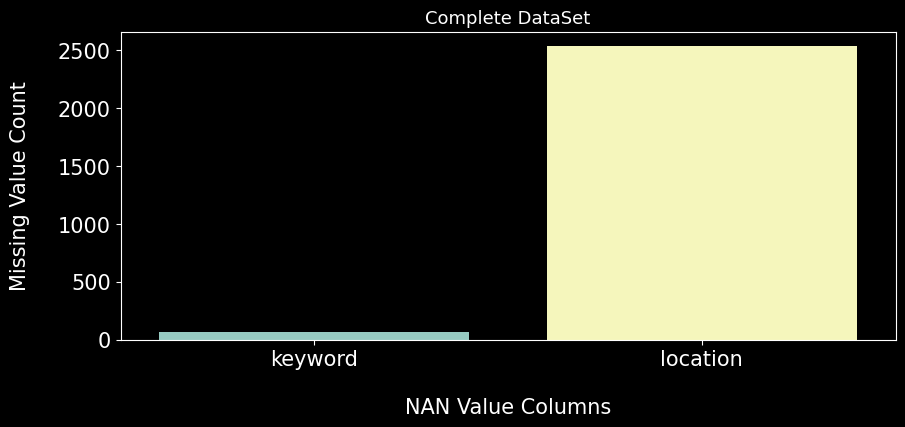

In [150]:
# Visualizing the Nan values which are present in the dataset
nan_values = ["keyword", "location"]

# Define a figure size and axis for plotting
fig, axes = plt.subplots(ncols=1, figsize=(10, 4), dpi=100)

# Using Seaborn to plot a bargraph for the missing values
sns.barplot(x=tweets[nan_values].isnull().sum().index, y=tweets[nan_values].isnull().sum().values, ax=axes)

# Setting the labels and title for the plot
axes.set_ylabel('Missing Value Count', size=15, labelpad=20)
axes.set_xlabel('NAN Value Columns', size=15, labelpad=20)
axes.tick_params(axis='x', labelsize=15)
axes.tick_params(axis='y', labelsize=15)

axes.set_title('Complete DataSet', fontsize=13)

plt.show()

In [151]:
for col in ['keyword', 'location']:
    tweets[col] = tweets[col].fillna(f'no{col}')


In [152]:
tweets.isna().sum()

keyword     0
location    0
text        0
target      0
dtype: int64

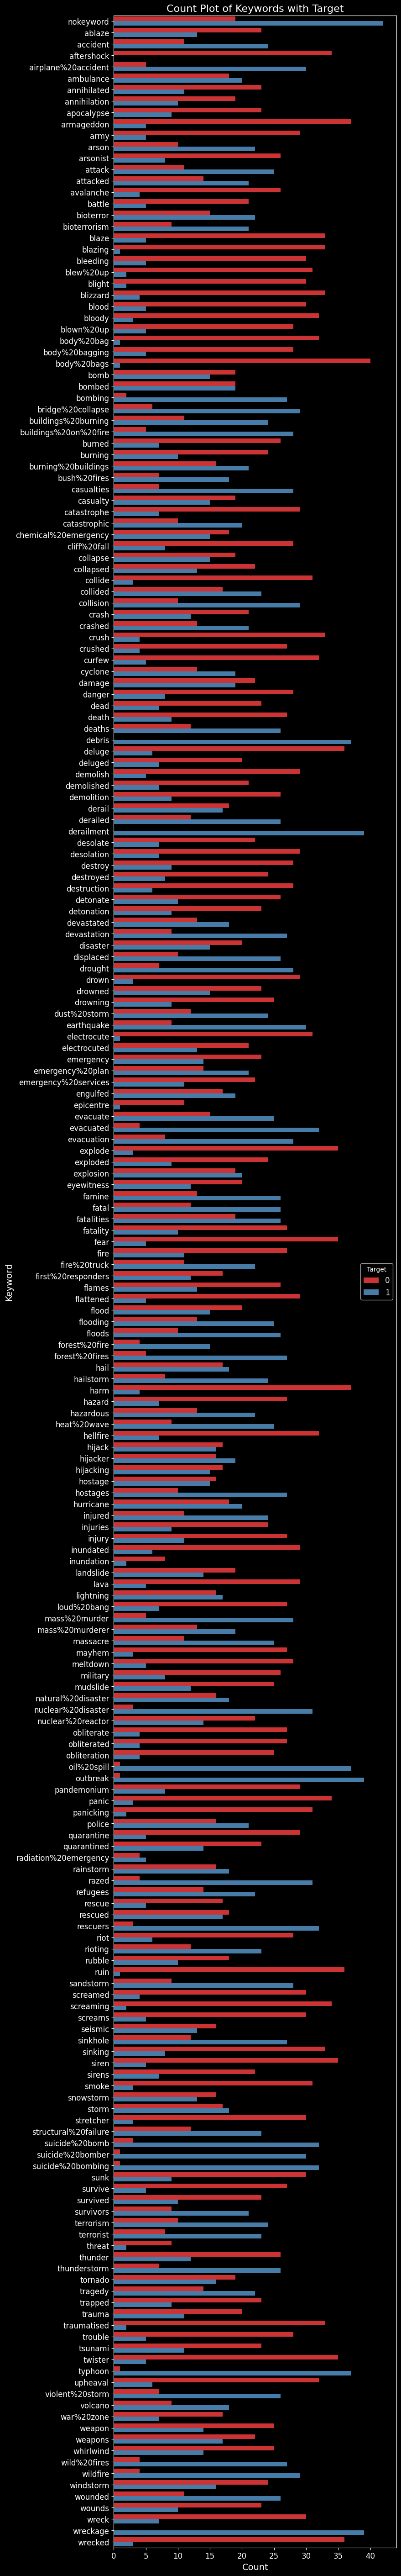

In [153]:
# count plot along y axis

# Define a figure size for plotting
fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y ='keyword', hue = "target", data = tweets,palette = "Set1")

# Add title and labels
plt.title('Count Plot of Keywords with Target', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Keyword', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(title='Target', fontsize=12)

# Show the plot
plt.show()

In [154]:
# Now we are adding columns into our dataset to get more insights from the data
# We are adding Word Count columns to get the count of words in each tweet
# We are adding Unique Word Count columns to get the count of unique words in each tweet
# We are adding Stop Word Count columns to get the count of stop words in each tweet
# We are adding URL Count columns to get the count of URL's in each tweet
# We are adding Mean Word Length columns to get the mean word length in each tweet
# We are adding Char Count columns to get the count of characters in each tweet
# We are adding Punctuation Count columns to get the count of punctuation in each tweet
# We are adding Hashtag Count columns to get the count of hashtags in each tweet
# We are adding Mention Count columns to get the count of mentions in each tweet


# word_count
tweets['word_count'] = tweets['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
tweets['unique_word_count'] = tweets['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
tweets['stop_word_count'] = tweets['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
tweets['url_count'] = tweets['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
tweets['mean_word_length'] = tweets['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
tweets['char_count'] = tweets['text'].apply(lambda x: len(str(x)))

# punctuation_count
tweets['punctuation_count'] = tweets['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
tweets['hashtag_count'] = tweets['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
tweets['mention_count'] = tweets['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

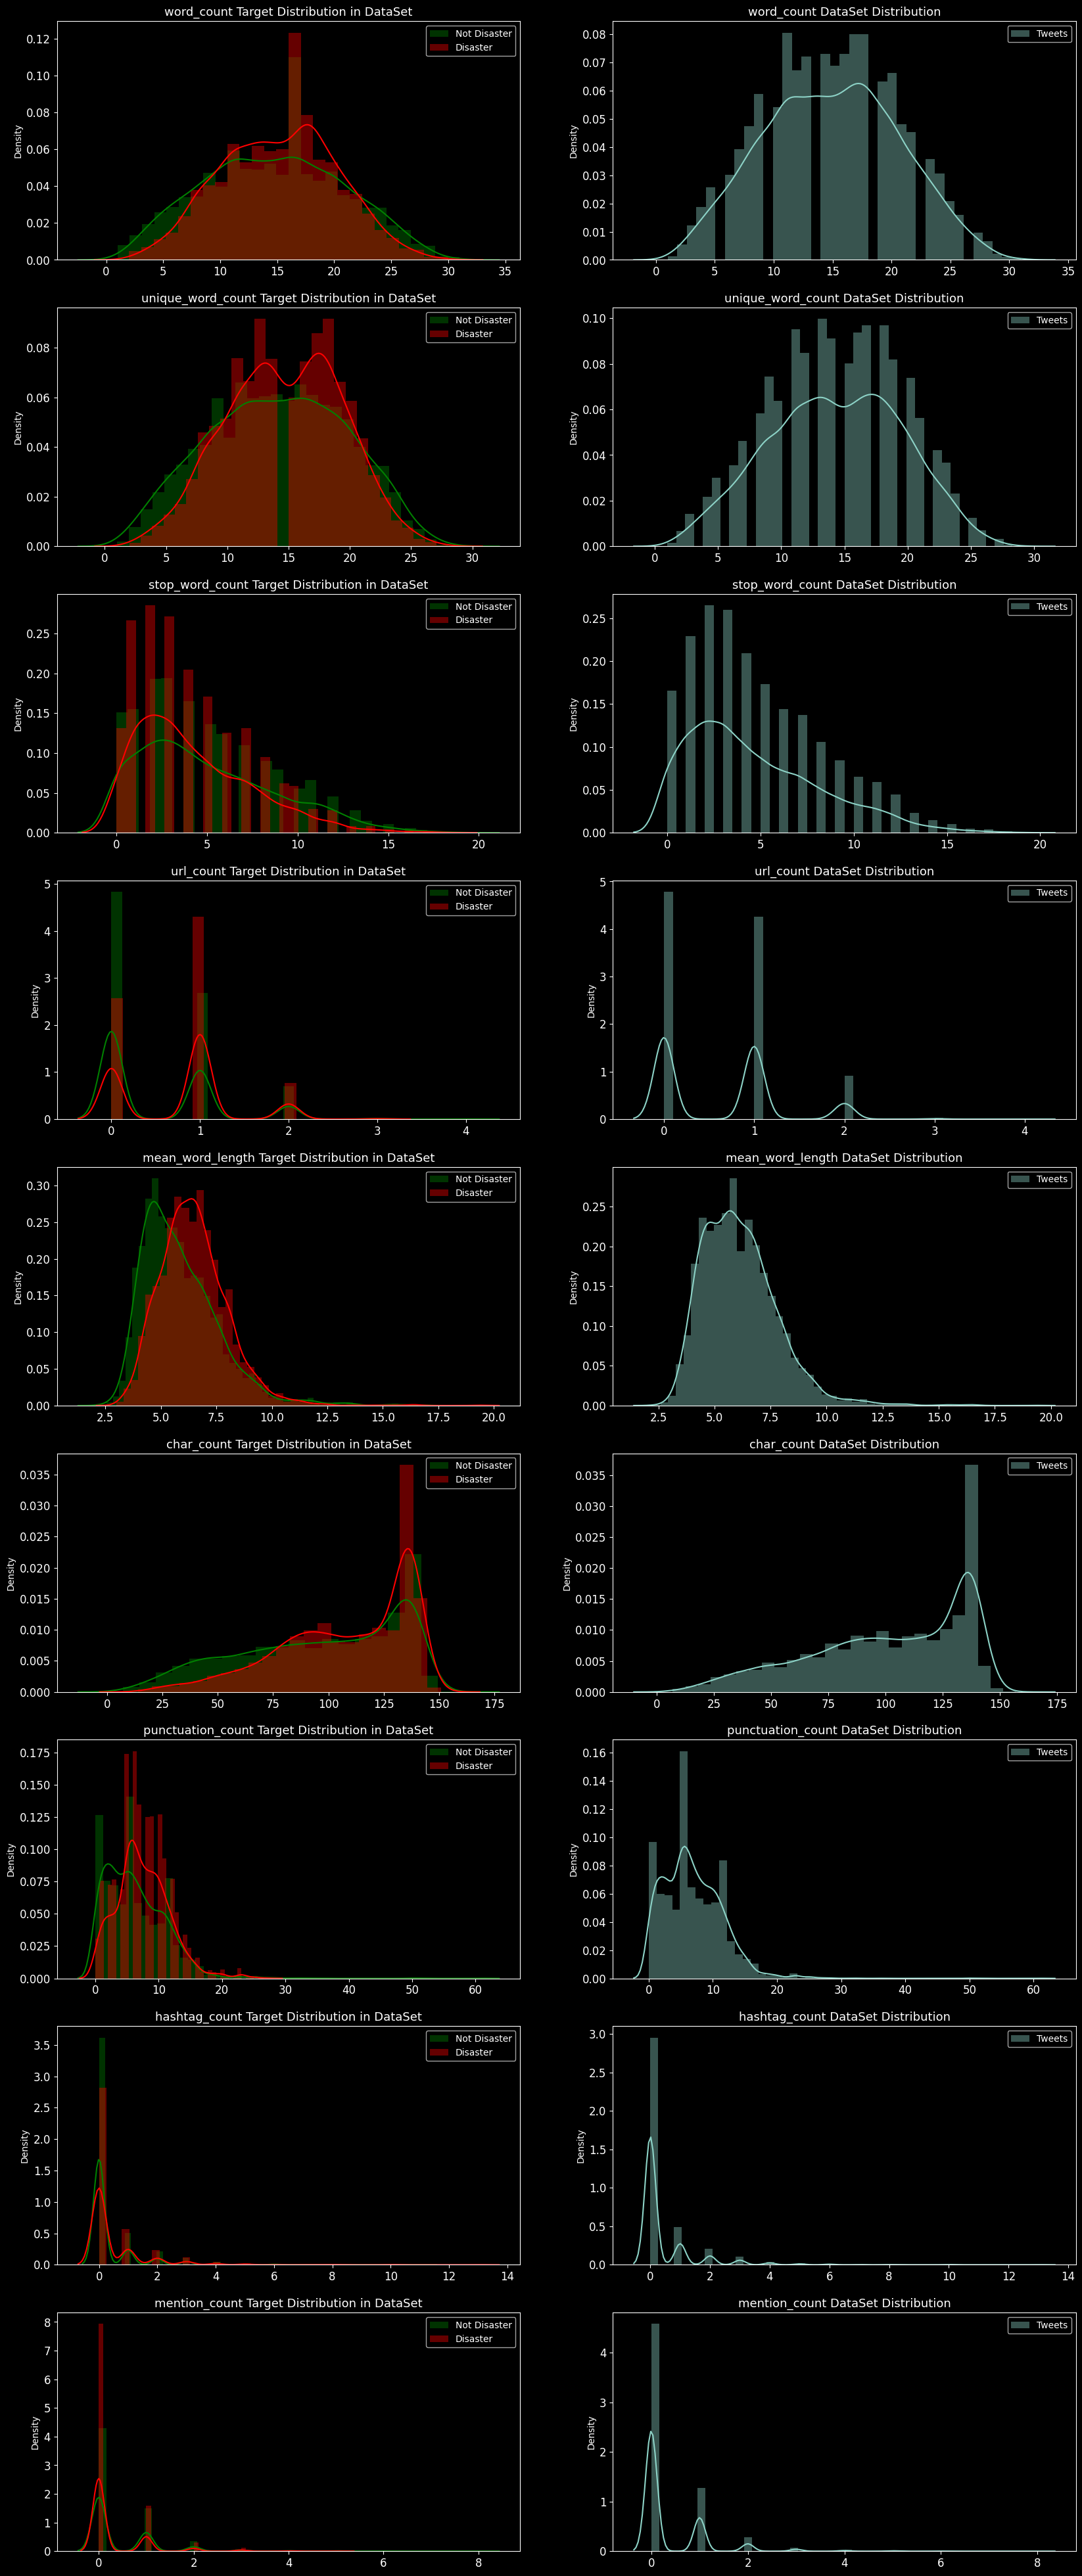

In [155]:
# Plotting the distribution of the new columns

# Define the features to plot
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']

DISASTER_TWEETS = tweets['target'] == 1

# Define the figure size and axis for plotting
fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

# Plot the distribution of the features 
for i, feature in enumerate(METAFEATURES):
    sns.distplot(tweets.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
    sns.distplot(tweets.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')

    sns.distplot(tweets[feature], label='Tweets', ax=axes[i][1])

    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()

    axes[i][0].set_title(f'{feature} Target Distribution in DataSet', fontsize=13)
    axes[i][1].set_title(f'{feature} DataSet Distribution', fontsize=13)

plt.show()

In [156]:
# Count of target variable values in the dataset
label_target_count=tweets.target.value_counts()

In [157]:
# Display the count of target variable values in the dataset
label_target_count

target
0    4342
1    3271
Name: count, dtype: int64

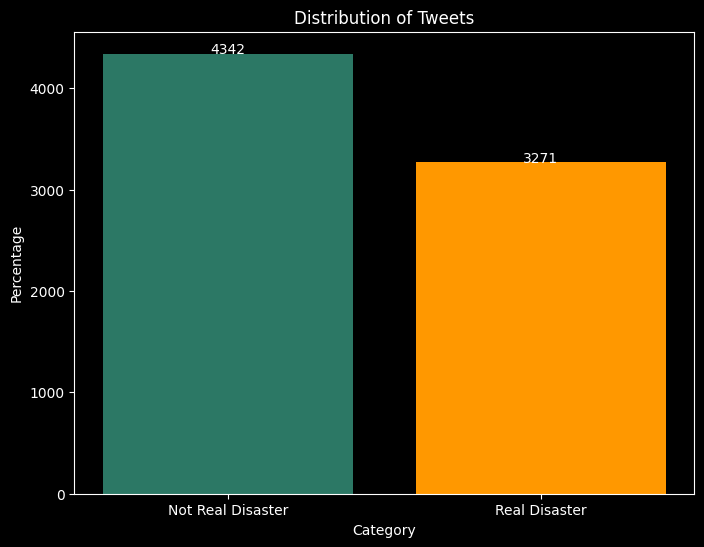

In [158]:
# Create a ling of both the target labels
target_label= ["Not Real Disaster", "Real Disaster"]

# Customize the colors
colors = ['#2C7865','#FF9800']

# Define the figure size for plotting
plt.figure(figsize=(8, 6))

# Plot the bar chart
plt.bar(target_label, label_target_count, color=colors)

# Add data labels
for i, v in enumerate(label_target_count):
    plt.text(i, v + 1, str(v), ha='center')

# Add title and labels
plt.title("Distribution of Tweets")
plt.xlabel("Category")
plt.ylabel("Percentage")

# Show the plot
plt.show()


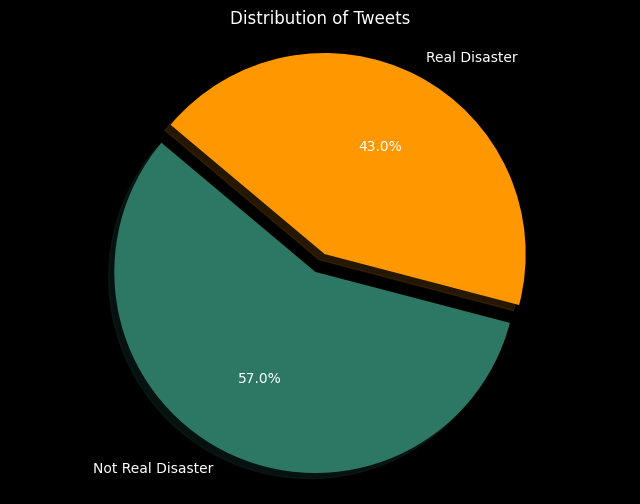

In [159]:
# Plot the distribution of the target variable in the dataset in the pie chart for a better ratio understanding
target_label = ["Not Real Disaster", "Real Disaster"]

# Customize the colors
colors = ['#2C7865','#FF9800']

# Explode the Real Disaster slice
explode = (0.1, 0)

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(label_target_count, labels=target_label, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Add title
plt.title("Distribution of Tweets")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

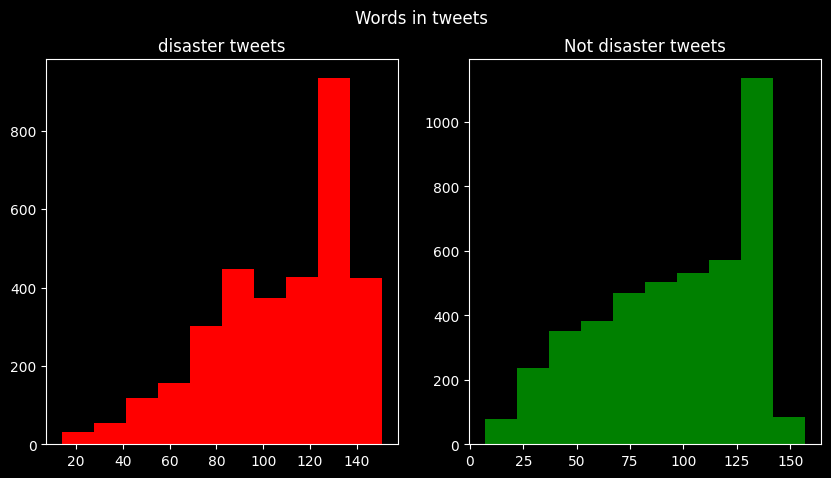

In [160]:
# Plot a histogram for the distribution of words in the tweets

# Define the figure size and axis for plotting
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

# Plot the histogram
tweet_len=tweets[tweets['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')

tweet_len=tweets[tweets['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in tweets')
plt.show()

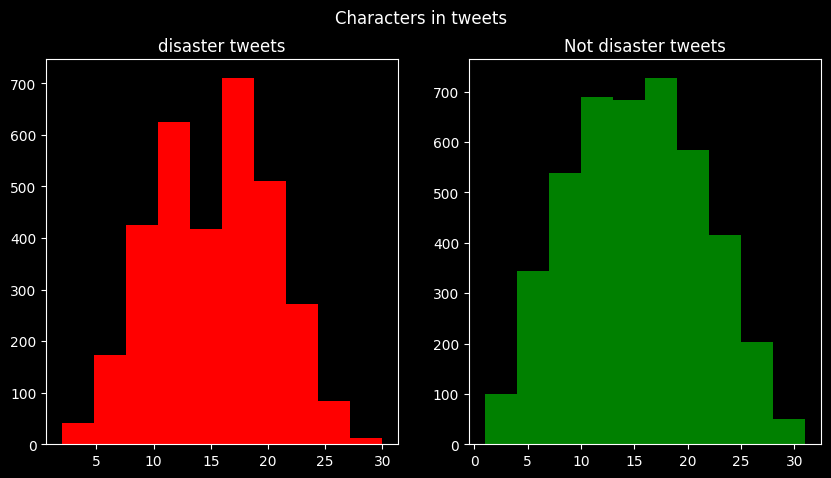

In [161]:
# Plot a histogram for the distribution of characters in the tweets

# Define the figure size and axis for plotting
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

# Plot the histogram
tweet_len=tweets[tweets['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')

tweet_len=tweets[tweets['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

In [162]:
#  Define a function for n-gram analysis
def gram(text,n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [163]:
# Initialize value to plot the top 100 n-gram words
N = 100

# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in tweets[DISASTER_TWEETS]['text']:
    for word in gram(tweet):
        disaster_unigrams[word] += 1

for tweet in tweets[~DISASTER_TWEETS]['text']:
    for word in gram(tweet):
        nondisaster_unigrams[word] += 1

df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

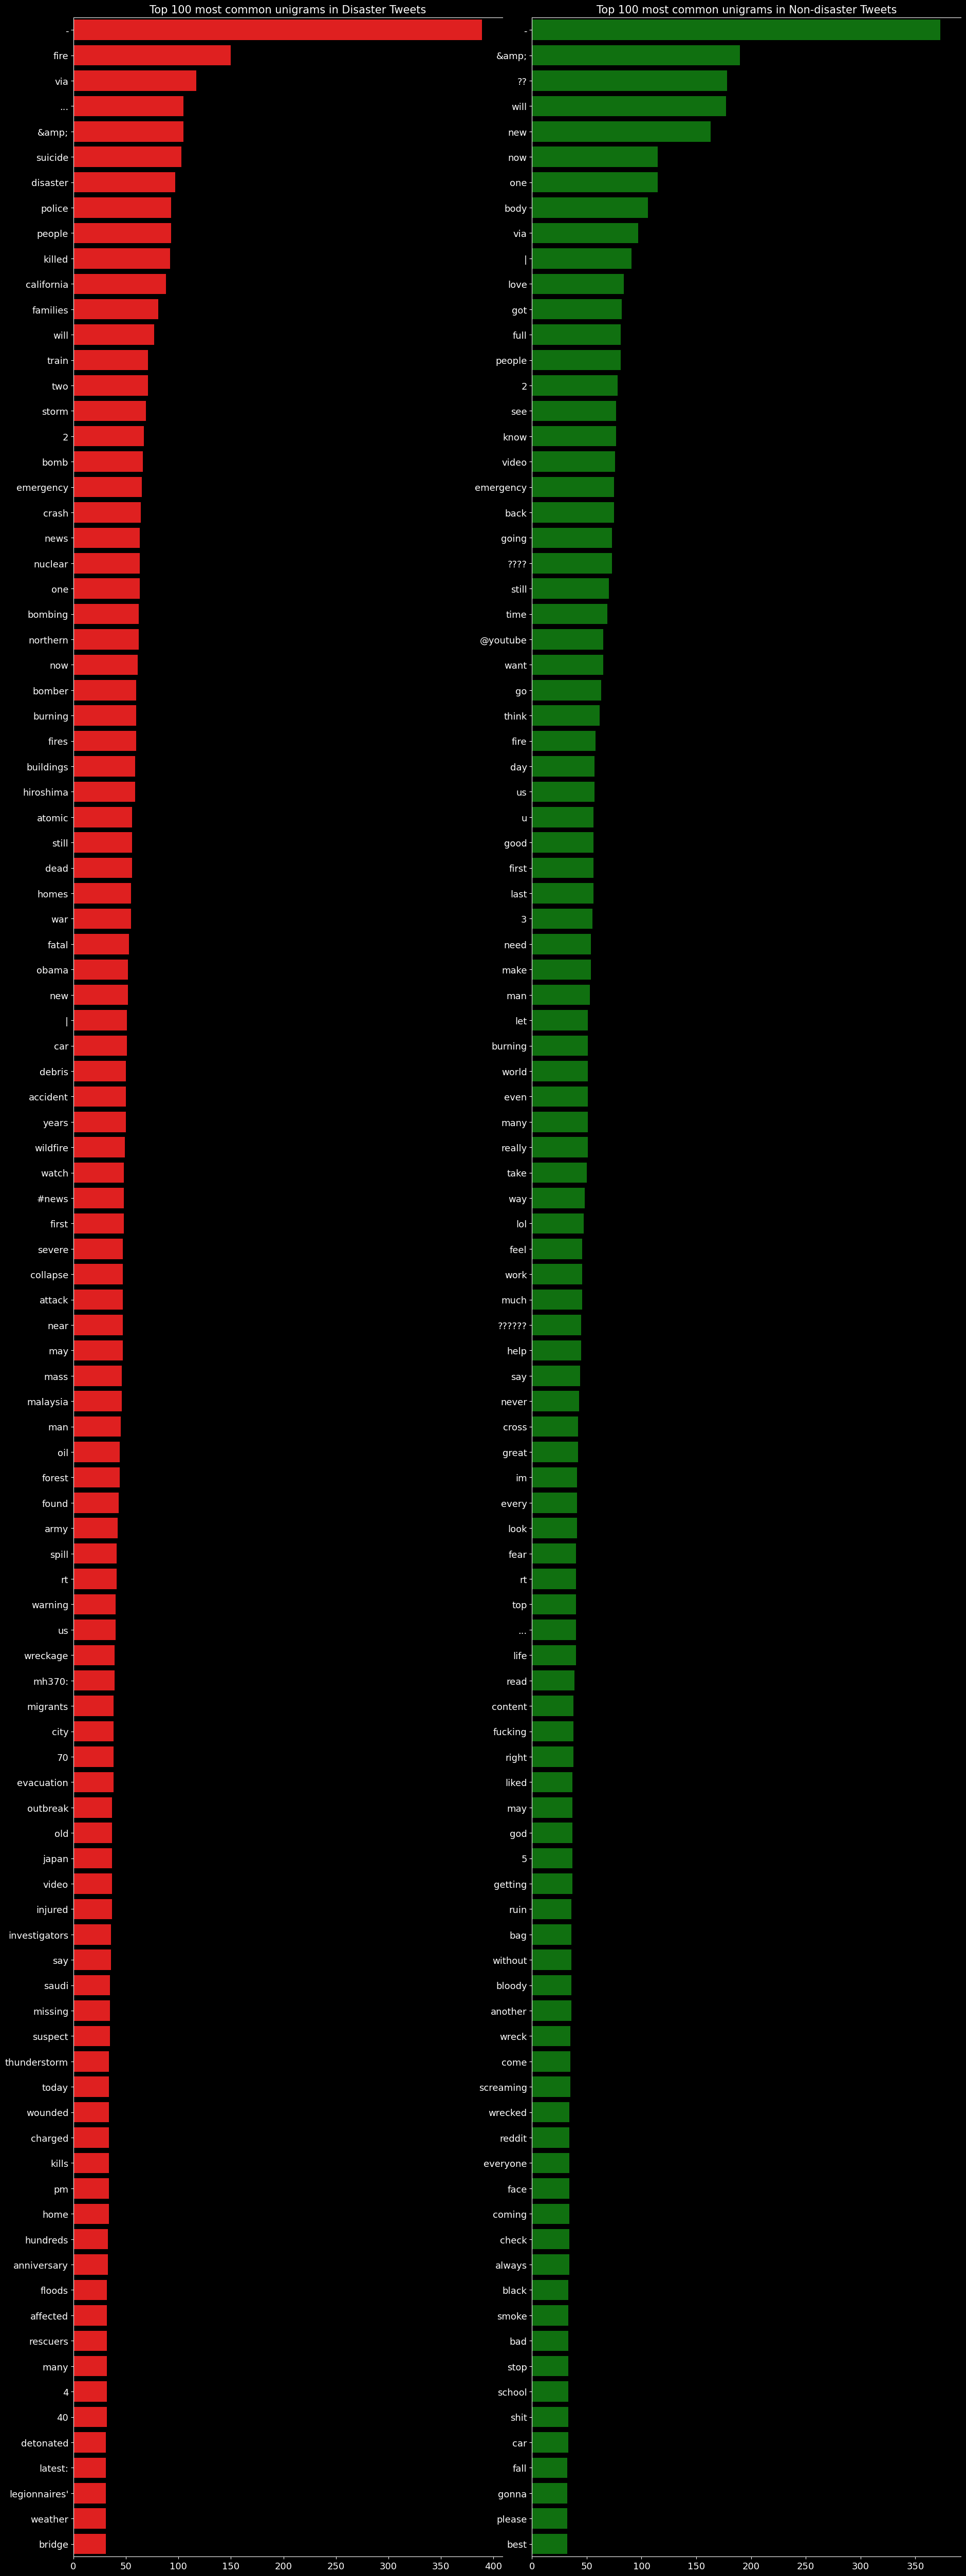

In [164]:
# Define the figure size and axis for plotting
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

# Plot the top 100 most common unigrams in disaster and non-disaster tweets
sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [165]:
# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in tweets[DISASTER_TWEETS]['text']:
    for word in gram(tweet, n_gram=2):
        disaster_bigrams[word] += 1

for tweet in tweets[~DISASTER_TWEETS]['text']:
    for word in gram(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1

df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

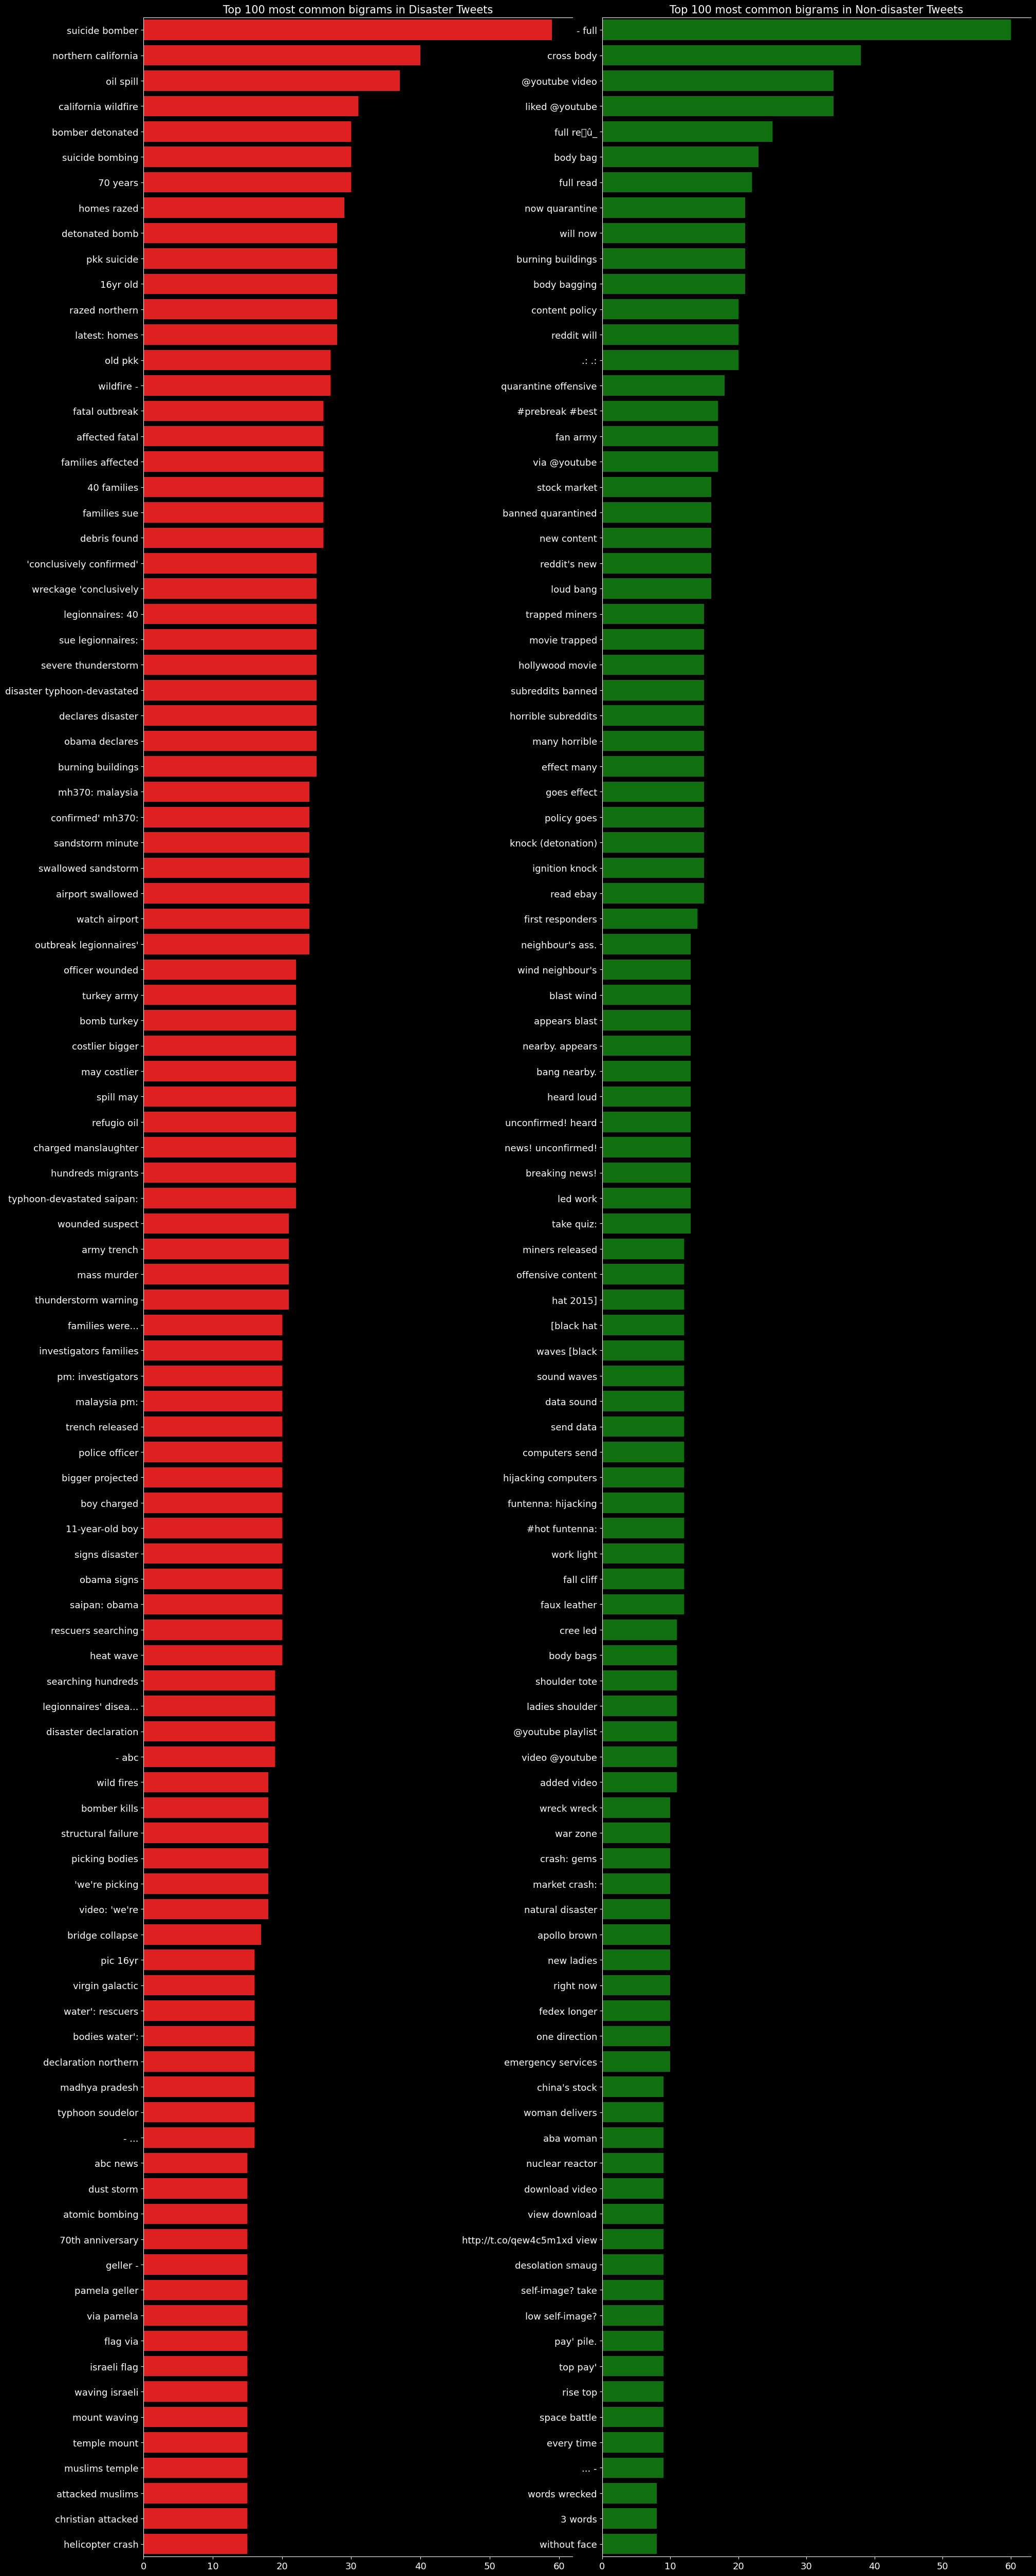

In [166]:
# Define the figure size and axis for plotting
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

# Plot the top 100 most common bigrams in disaster and non-disaster tweets
sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [167]:
# Trigrams
disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in tweets[DISASTER_TWEETS]['text']:
    for word in gram(tweet, n_gram=3):
        disaster_trigrams[word] += 1

for tweet in tweets[~DISASTER_TWEETS]['text']:
    for word in gram(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1

df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

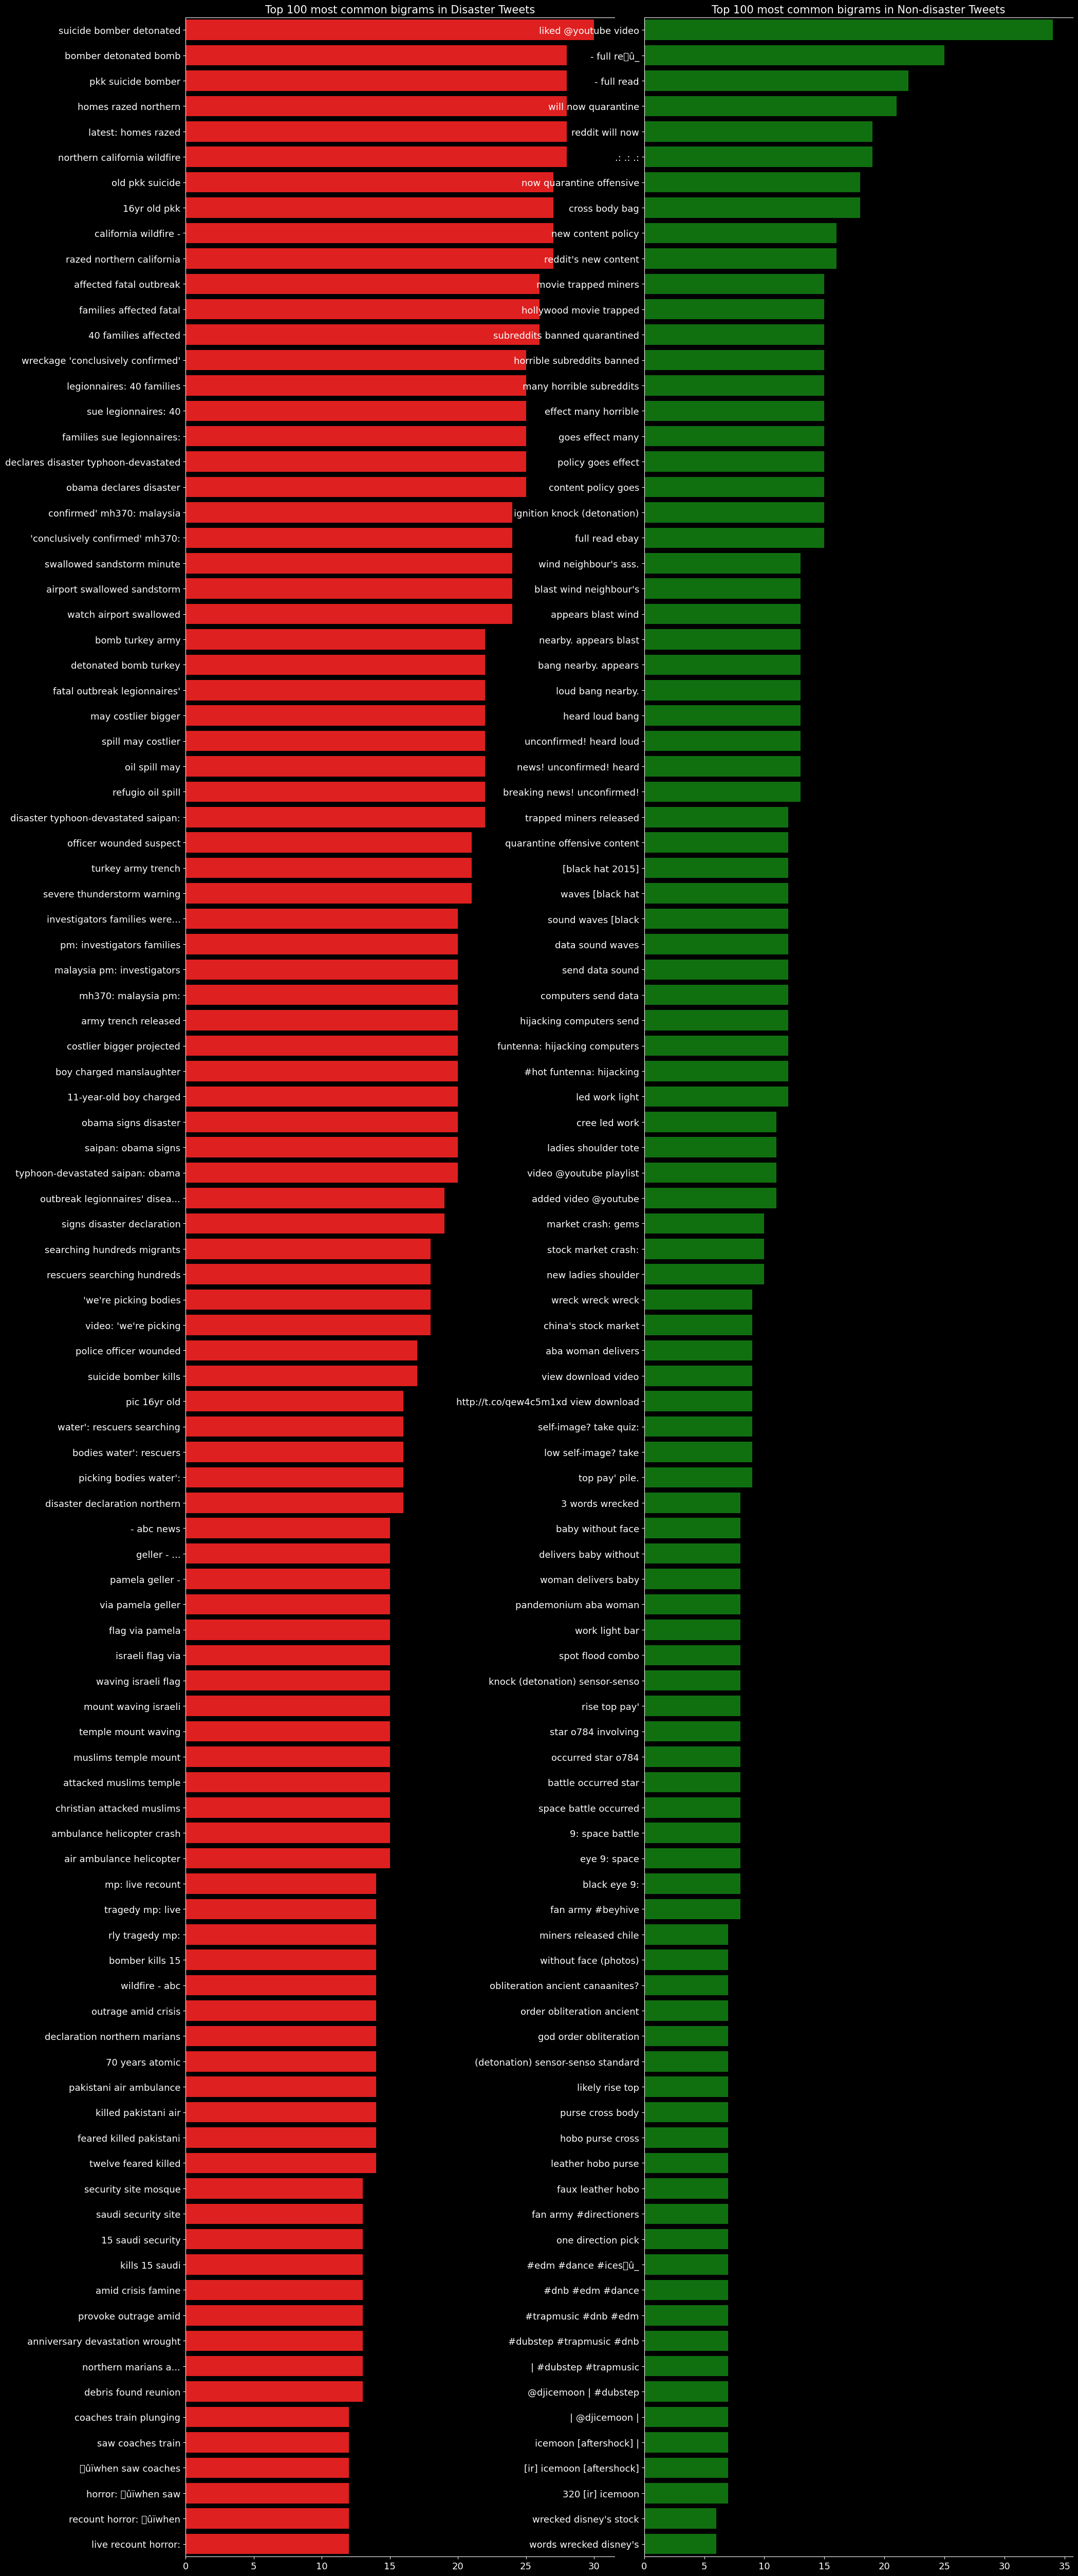

In [168]:
# Define the figure size and axis for plotting
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

# Plot the top 100 most common trigrams in disaster and non-disaster tweets
sns.barplot(y=df_disaster_trigrams[0].values[:N], x=df_disaster_trigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_trigrams[0].values[:N], x=df_nondisaster_trigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [169]:
# Dropping all the useless columns which we just created for the analysis and the target variable from the main dataset because we have already stored it in a variable (tweets_target)
tweets.drop(columns=['word_count','unique_word_count','stop_word_count','url_count',
		  'mean_word_length','char_count','punctuation_count','hashtag_count','mention_count','target'],inplace=True)

In [170]:
# Creating a new column in the dataset by combining all the text columns (keyword, location, text) into a single column, So that we can make embeddings on it and make predictions 
tweets['complete_text'] = tweets['keyword'] + ' ' + tweets['location'] + ' ' + tweets['text']

In [171]:
# Display the first 3 rows of the dataset after adding the new column complete_text
tweets.head(3)

,keyword,location,text,complete_text
0,nokeyword,nolocation,Our Deeds are the Reason of this #earthquake M...,nokeyword nolocation Our Deeds are the Reason ...
1,nokeyword,nolocation,Forest fire near La Ronge Sask. Canada,nokeyword nolocation Forest fire near La Ronge...
2,nokeyword,nolocation,All residents asked to 'shelter in place' are ...,nokeyword nolocation All residents asked to 's...


## Data Cleaning and Embedding Creations

In [172]:
# Create an new instance text_clean of the class X_clean to clean the training data and create a Word2Vec model on the cleaned data.
# The method should take as input the training data and a boolen value train if it is a training data or not, 
# and return a Message when the trainnig is done.
text_clean = X_clean(train=True,training_list=tweets['complete_text'])

# Call the get_embedding method to train the Word2Vec model
text_clean.get_embedding()

'Training Done'

In [173]:
# Create a new column in the dataset to store the average embeddings of the complete_text column in the dataset
tweets['embeddings'] = tweets['complete_text'].apply(lambda x: X_clean(text = x).average_embed())

In [174]:
# Display the first 5 rows of the dataset after adding the new column embeddings
tweets.head()

,keyword,location,text,complete_text,embeddings
0,nokeyword,nolocation,Our Deeds are the Reason of this #earthquake M...,nokeyword nolocation Our Deeds are the Reason ...,"[0.059502742149763636, -0.09196804670823945, 0..."
1,nokeyword,nolocation,Forest fire near La Ronge Sask. Canada,nokeyword nolocation Forest fire near La Ronge...,"[0.07087180437520146, -0.11301099555566907, 0...."
2,nokeyword,nolocation,All residents asked to 'shelter in place' are ...,nokeyword nolocation All residents asked to 's...,"[0.042874120113750296, -0.06849873326718807, 0..."
3,nokeyword,nolocation,"13,000 people receive #wildfires evacuation or...","nokeyword nolocation 13,000 people receive #wi...","[0.0637905590960549, -0.10423110922177632, 0.1..."
4,nokeyword,nolocation,Just got sent this photo from Ruby #Alaska as ...,nokeyword nolocation Just got sent this photo ...,"[0.05755110305141319, -0.09183101897889917, 0...."


In [175]:
# Showing how embeddings looks like for a single tweet
d= 'body%20bagging Cloud 9 Mopheme and Bigstar Johnson are a problem in this game body bagging niggas #VuzuHustle'
X_clean(text = d,train=False).average_embed()

array([ 0.04020917, -0.06455992,  0.12827842,  0.15728277,  0.19987937,
       -0.07406929,  0.04596582,  0.07531844,  0.0666858 ,  0.11168434,
       -0.02852251, -0.10207956, -0.01183071, -0.25505489,  0.03033116,
        0.14428098,  0.00958754,  0.0564508 , -0.13394777,  0.07176924,
        0.11376163,  0.12072695, -0.07886513, -0.09125665, -0.25915815,
        0.09247576, -0.02434904,  0.06722289, -0.07809491,  0.00326409,
       -0.04443641, -0.03332038, -0.06955559,  0.00957556, -0.01313167,
        0.10305468,  0.08824742, -0.02508674,  0.05722042, -0.08805439,
       -0.24984799,  0.11188167, -0.00375499,  0.00041058,  0.18363749,
       -0.06862756, -0.02824702, -0.08394085,  0.01350446, -0.10086616,
       -0.02443787, -0.08312573, -0.03326971,  0.13465636,  0.00164591,
        0.00620917, -0.03390825, -0.00641355, -0.11057752,  0.1085784 ,
       -0.15691532,  0.04650195, -0.00905875,  0.01336256,  0.30152296,
       -0.10421238,  0.05564916,  0.15245766, -0.14734932,  0.18

In [176]:
# Display the first 2 rows of Embeddings columns
tweets["embeddings"].head(2)

0    [0.059502742149763636, -0.09196804670823945, 0...
1    [0.07087180437520146, -0.11301099555566907, 0....
Name: embeddings, dtype: object

## Model trainig

#### Algorithms we use

* `RandomForestClassifier`
* `LogisticRegressionCV`
* `KNeighborsClassifier`
* `DecisionTreeClassifier`
* `RidgeClassifierCV`
* `ExtraTreeClassifier`
* `GradientBoostingClassifier`
* `XGBClassifier`
* `AdaBoostClassifier`
* `BernoulliNB`
* `CatBoostClassifier`

In [177]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tweets['embeddings'].tolist(), tweets_target.tolist(), test_size=0.2, random_state=42)

In [178]:
# For this Project , we are using the following Models and the libraries with respect to those  models are as follow:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from catboost import CatBoostClassifier

# To Store the Accuracy of each model in a dictionary
modal_accuracy_dict = {}

# List of models to test, you can add or remove any classifiers here
model_testing = [RandomForestClassifier(max_depth= 15, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 200, random_state=13), 
                 LogisticRegressionCV(max_iter=1000,random_state=13), 
                 KNeighborsClassifier(), 
                 DecisionTreeClassifier(random_state=13),
                 RidgeClassifierCV(),
                 GradientBoostingClassifier(random_state=13),
                 XGBClassifier(random_state = 13),
                 ExtraTreeClassifier(random_state=13),
                 AdaBoostClassifier(random_state=13),
                 BernoulliNB(),
                 CatBoostClassifier(logging_level='Silent', random_state=13)]

# Fit each model one by one to get the accuracy as results
for model in model_testing:
    # Fit the model
    model.fit(X_train, y_train)
    # Predict the model's accuracy on the testing data set
    ypred = model.predict(X_test)
    # Calculate the accuracy of the model and store it in the dictionary
    accuracy = accuracy_score(y_test, ypred)
    modal_accuracy_dict[model.__class__.__name__] = accuracy
    # Save the model in the trained_models folder
    with open('trained_models/'+ model.__class__.__name__+'.'+'pickle', 'wb') as f:
        pickle.dump(model, f)
    # Print the model and its accuracy
    print("model: {}  score {}".format(model, accuracy))

model: RandomForestClassifier(max_depth=15, min_samples_split=3, n_estimators=200,
                       random_state=13)  score 0.701247537754432
model: LogisticRegressionCV(max_iter=1000, random_state=13)  score 0.7183191070256073
model: KNeighborsClassifier()  score 0.6250820748522653
model: DecisionTreeClassifier(random_state=13)  score 0.6217990807616546
model: RidgeClassifierCV()  score 0.7137229152987524
model: GradientBoostingClassifier(random_state=13)  score 0.701247537754432
model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max

In [179]:
# Print the accuracy of each model in the dictionary again for a better understanding
modal_accuracy_dict

{'RandomForestClassifier': 0.701247537754432,
 'LogisticRegressionCV': 0.7183191070256073,
 'KNeighborsClassifier': 0.6250820748522653,
 'DecisionTreeClassifier': 0.6217990807616546,
 'RidgeClassifierCV': 0.7137229152987524,
 'GradientBoostingClassifier': 0.701247537754432,
 'XGBClassifier': 0.6933683519369666,
 'ExtraTreeClassifier': 0.5830597504924491,
 'AdaBoostClassifier': 0.6677609980302035,
 'BernoulliNB': 0.602757715036113,
 'CatBoostClassifier': 0.7045305318450427}

---------------------------------------------

 Model Name --> RandomForestClassifier 

 * F1 score (weighted) --> 0.48825309556298685
 * ROC AUC SCORE --> 0.48576052578689977
 * Precison --> 0.49236848810234213
 * Recall --> 0.5272488509520683
 * Accuracy --> 0.5272488509520683
 * Confusion Matrix --> 
 [[670 204]
 [516 133]]
   - FALSE POSITIVES --> 204
   -False Negatives --> 516
   -True POSITIVES --> 133
   -True Negatives --> 670


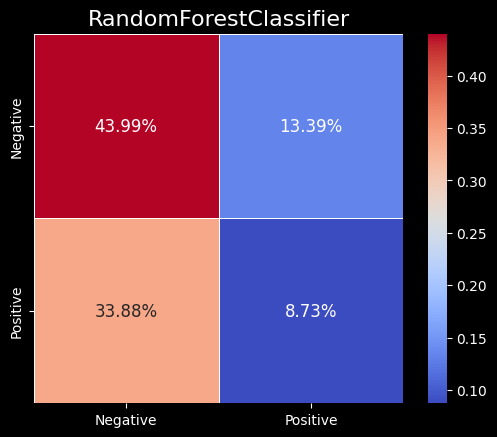

---------------------------------------------

 Model Name --> LogisticRegressionCV 

 * F1 score (weighted) --> 0.5744905743108125
 * ROC AUC SCORE --> 0.5877666044927419
 * Precison --> 0.719217810813346
 * Recall --> 0.6447800393959291
 * Accuracy --> 0.6447800393959291
 * Confusion Matrix --> 
 [[851  23]
 [518 131]]
   - FALSE POSITIVES --> 23
   -False Negatives --> 518
   -True POSITIVES --> 131
   -True Negatives --> 851


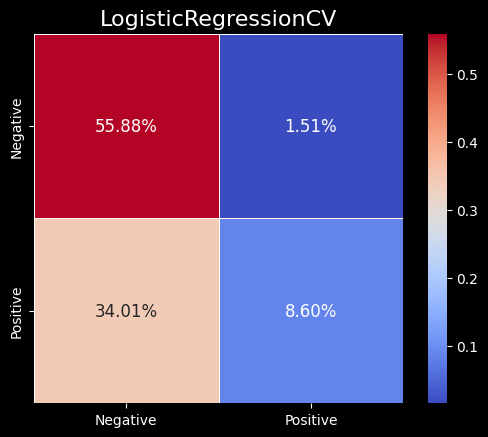

---------------------------------------------

 Model Name --> KNeighborsClassifier 

 * F1 score (weighted) --> 0.4953899683422461
 * ROC AUC SCORE --> 0.5070721370318003
 * Precison --> 0.5231344712379757
 * Recall --> 0.5587655942219304
 * Accuracy --> 0.5587655942219304
 * Confusion Matrix --> 
 [[749 125]
 [547 102]]
   - FALSE POSITIVES --> 125
   -False Negatives --> 547
   -True POSITIVES --> 102
   -True Negatives --> 749


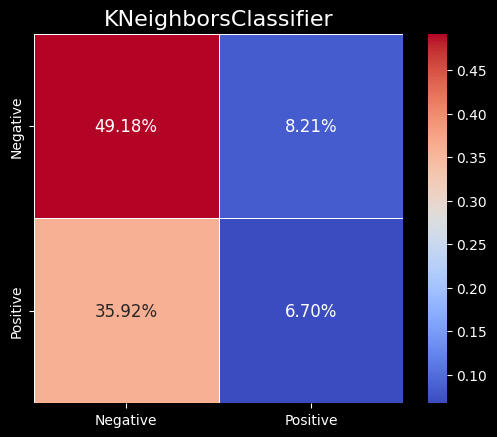

---------------------------------------------

 Model Name --> DecisionTreeClassifier 

 * F1 score (weighted) --> 0.5090775798460877
 * ROC AUC SCORE --> 0.49547182251871386
 * Precison --> 0.5063101238360217
 * Recall --> 0.5160866710439921
 * Accuracy --> 0.5160866710439921
 * Confusion Matrix --> 
 [[555 319]
 [418 231]]
   - FALSE POSITIVES --> 319
   -False Negatives --> 418
   -True POSITIVES --> 231
   -True Negatives --> 555


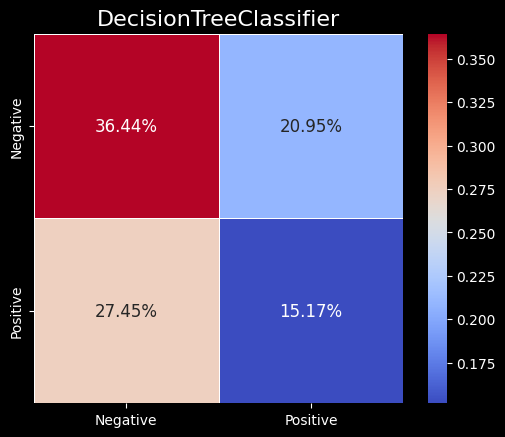

---------------------------------------------

 Model Name --> RidgeClassifierCV 

 * F1 score (weighted) --> 0.48979895796477924
 * ROC AUC SCORE --> 0.5383453861423843
 * Precison --> 0.7433784603383898
 * Recall --> 0.6060407091267236
 * Accuracy --> 0.6060407091267236
 * Confusion Matrix --> 
 [[871   3]
 [597  52]]
   - FALSE POSITIVES --> 3
   -False Negatives --> 597
   -True POSITIVES --> 52
   -True Negatives --> 871


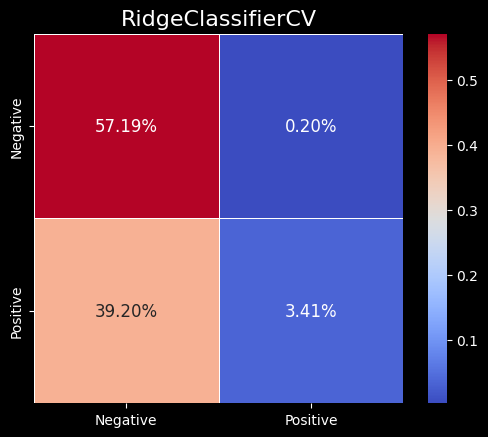

---------------------------------------------

 Model Name --> GradientBoostingClassifier 

 * F1 score (weighted) --> 0.32328293150396437
 * ROC AUC SCORE --> 0.5038820505407016
 * Precison --> 0.5278915151145671
 * Recall --> 0.43992120814182534
 * Accuracy --> 0.43992120814182534
 * Confusion Matrix --> 
 [[ 62 812]
 [ 41 608]]
   - FALSE POSITIVES --> 812
   -False Negatives --> 41
   -True POSITIVES --> 608
   -True Negatives --> 62


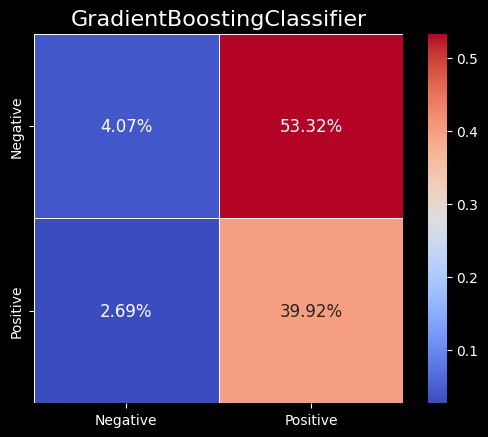

---------------------------------------------

 Model Name --> XGBClassifier 

 * F1 score (weighted) --> 0.4993094778920784
 * ROC AUC SCORE --> 0.49370885678724186
 * Precison --> 0.5030933214226171
 * Recall --> 0.5325016414970453
 * Accuracy --> 0.5325016414970453
 * Confusion Matrix --> 
 [[661 213]
 [499 150]]
   - FALSE POSITIVES --> 213
   -False Negatives --> 499
   -True POSITIVES --> 150
   -True Negatives --> 661


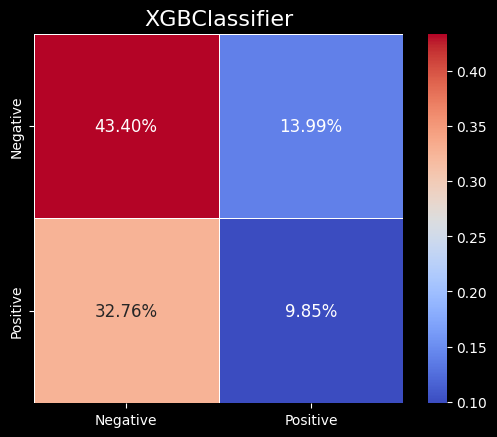

---------------------------------------------

 Model Name --> ExtraTreeClassifier 

 * F1 score (weighted) --> 0.49448963383665456
 * ROC AUC SCORE --> 0.5453452415791942
 * Precison --> 0.5679947820128703
 * Recall --> 0.5134602757715037
 * Accuracy --> 0.5134602757715037
 * Confusion Matrix --> 
 [[288 586]
 [155 494]]
   - FALSE POSITIVES --> 586
   -False Negatives --> 155
   -True POSITIVES --> 494
   -True Negatives --> 288


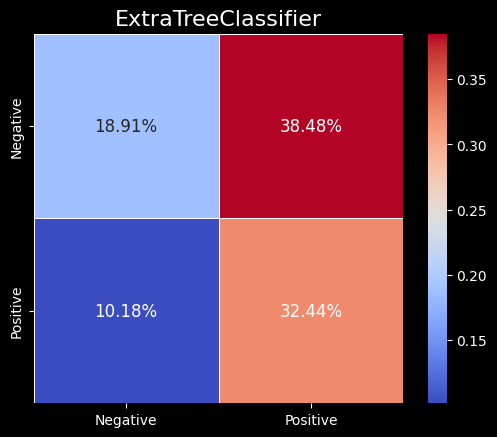

---------------------------------------------

 Model Name --> AdaBoostClassifier 

 * F1 score (weighted) --> 0.513763072063952
 * ROC AUC SCORE --> 0.507333937442924
 * Precison --> 0.5180490823494617
 * Recall --> 0.5114904793171372
 * Accuracy --> 0.5114904793171372
 * Confusion Matrix --> 
 [[468 406]
 [338 311]]
   - FALSE POSITIVES --> 406
   -False Negatives --> 338
   -True POSITIVES --> 311
   -True Negatives --> 468


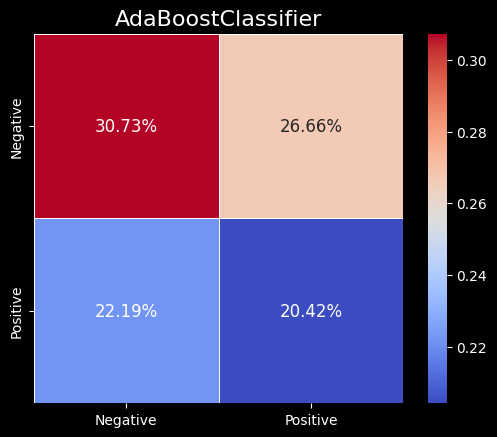

---------------------------------------------

 Model Name --> BernoulliNB 

 * F1 score (weighted) --> 0.2546593727365176
 * ROC AUC SCORE --> 0.5
 * Precison --> 0.18158902087449652
 * Recall --> 0.4261326329612607
 * Accuracy --> 0.4261326329612607
 * Confusion Matrix --> 
 [[  0 874]
 [  0 649]]
   - FALSE POSITIVES --> 874
   -False Negatives --> 0
   -True POSITIVES --> 649
   -True Negatives --> 0


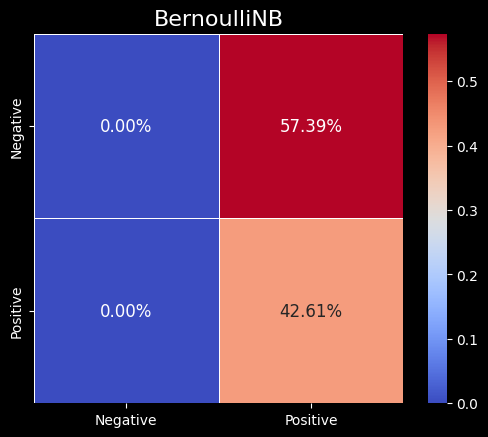

---------------------------------------------

 Model Name --> CatBoostClassifier 

 * F1 score (weighted) --> 0.36222661481542884
 * ROC AUC SCORE --> 0.5096178595480462
 * Precison --> 0.5377825543458084
 * Recall --> 0.45173998686802364
 * Accuracy --> 0.45173998686802364
 * Confusion Matrix --> 
 [[103 771]
 [ 64 585]]
   - FALSE POSITIVES --> 771
   -False Negatives --> 64
   -True POSITIVES --> 585
   -True Negatives --> 103


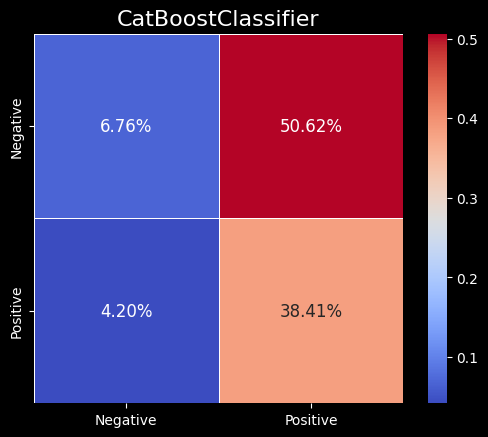

---------------------------------------------


In [180]:
# Evaluate the models using the F1 score, ROC AUC score, Precision, Recall, Accuracy, and Confusion Matrix
# And Creating a Heatmap for the Confusion Matrix for each model we are using

print('---------------------------------------------')

for model in model_testing:
    # Loading the saved model one by one
    with open('trained_model/'+ model.__class__.__name__+'.'+'pickle', 'rb') as f:
        model = pickle.load(f)
    # Prediction on the test data set
    ypred = model.predict(X_test)
    # Calculating the F1 score, ROC AUC score, Precision, Recall, Accuracy, and Confusion Matrix
    f1_sc = f1_score(y_test, ypred, average='weighted')
    roc_auc_scr = roc_auc_score(y_test, ypred)
    precision = precision_score(y_test, ypred, average='weighted')
    recall = recall_score(y_test, ypred, average='weighted')
    acc = accuracy_score(y_test, ypred)
    confusion_score = confusion_matrix(y_test, ypred)
    tn, fp, fn, tp = confusion_score.ravel()

    # Printing the results
    print('\n Model Name -->',model.__class__.__name__,'\n')
    print('=============================================')
    print(' * F1 score (weighted) -->',f1_sc)
    print(' * ROC AUC SCORE -->',roc_auc_scr)
    print(' * Precison -->',precision)
    print(' * Recall -->',recall)
    print(' * Accuracy -->',acc)
    print(' * Confusion Matrix --> \n',confusion_score)
    print('   - FALSE POSITIVES -->',fp)
    print('   -False Negatives -->',fn)
    print('   -True POSITIVES -->',tp)
    print('   -True Negatives -->',tn)
    print('=============================================')
    # Create the heatmap with annotation and title
    sns.heatmap(confusion_score/np.sum(confusion_score), annot=True, cmap='coolwarm', fmt='.2%', linewidths=.5, cbar=True, annot_kws={'fontsize':12}, 
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], square=True)

    # Add title to the heatmap
    plt.title(model.__class__.__name__, fontsize=16)
    plt.show()
    print('---------------------------------------------')